# Assessing Image Quality
In this notebook, we assess the quality of the image reconstruction using FISTA and SART. We apply two metrics, the structural similarity (SSIM) index and the mean squared error (MSE), to both the global image and a defined region of interest (ROI).

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as scio
from skimage import metrics

import plot_utils

In [2]:
plot_utils.set_print_params()

Load in the data.

In [3]:
data_dir = "data"
results_dir = "results"

ref_image = scio.loadmat(os.path.join(data_dir, "project_data.mat"))["imgref"]
sart_reconstructions = [
    os.path.join(results_dir, "sartFullReconstruction.txt"),
    os.path.join(results_dir, "sart270Reconstruction.txt"),
    os.path.join(results_dir, "sart90Reconstruction.txt")
]
fista_reconstructions = [
    os.path.join(results_dir, "fistaFullReconstruction_lambda_2.00e-04.txt"),
    os.path.join(results_dir, "fista270Reconstruction_lambda_1.00e-03.txt"),
    os.path.join(results_dir, "fista90Reconstruction_lambda_2.00e-04.txt")
]
comparison_names = [
    os.path.join(results_dir, "comparisonFull"),
    os.path.join(results_dir, "comparison270"),
    os.path.join(results_dir, "comparison90")
]

## Helper function to get the ROI

In [4]:
roi_top = 175
roi_bottom = 220
roi_left = 100
roi_right = 140
def get_roi(image):
    return image[roi_top:roi_bottom, roi_left:roi_right]

ref_roi = get_roi(ref_image)

## Assess image quality
For each dataset, compute SSIM and MSE for FISTA and SART on both the full image and the ROI. Plot the three images side-by-side (and the ROIs).

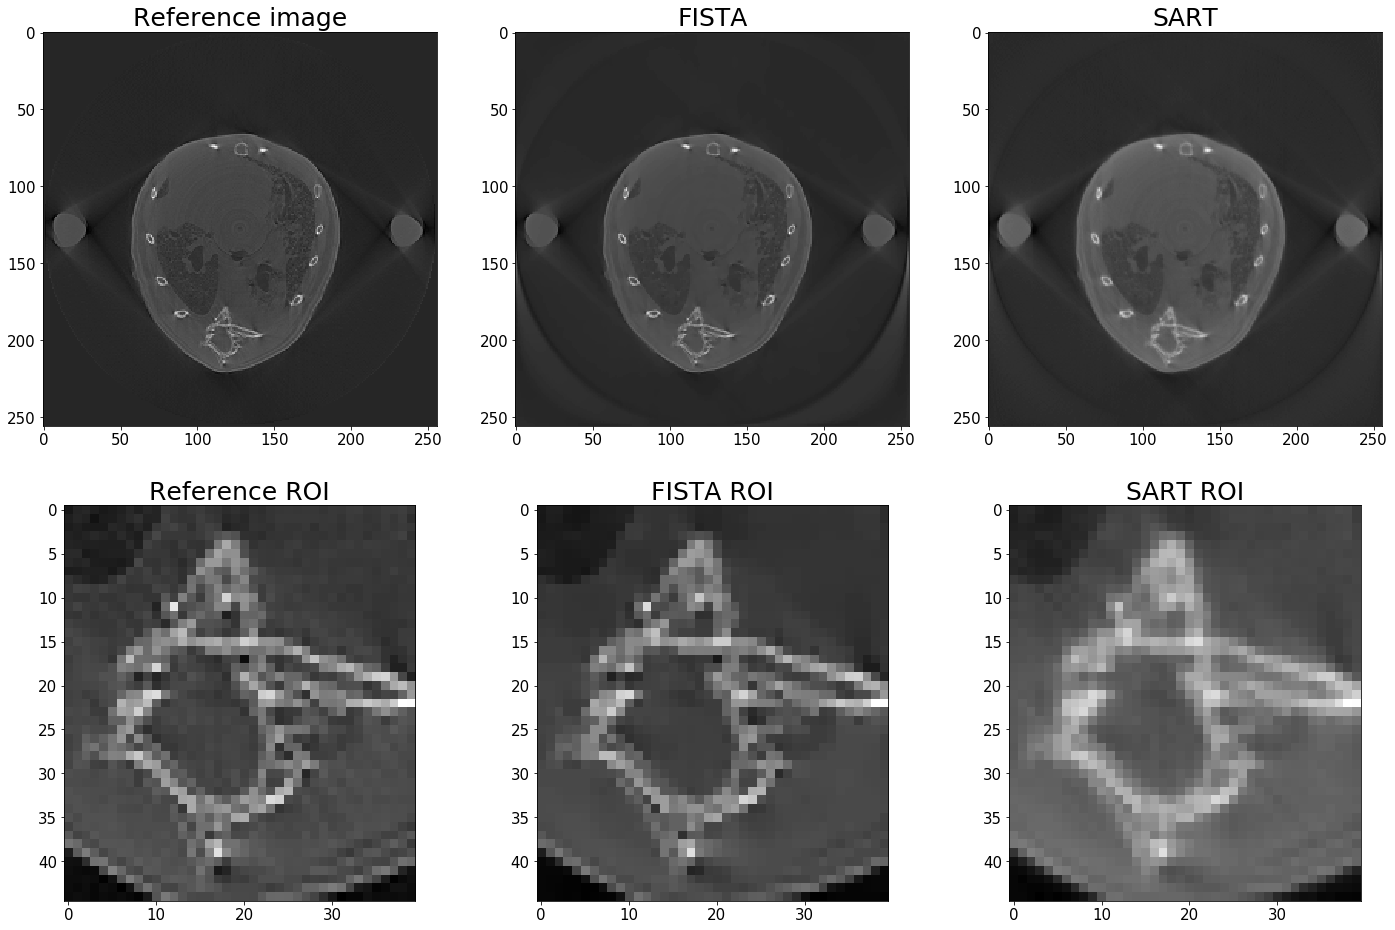

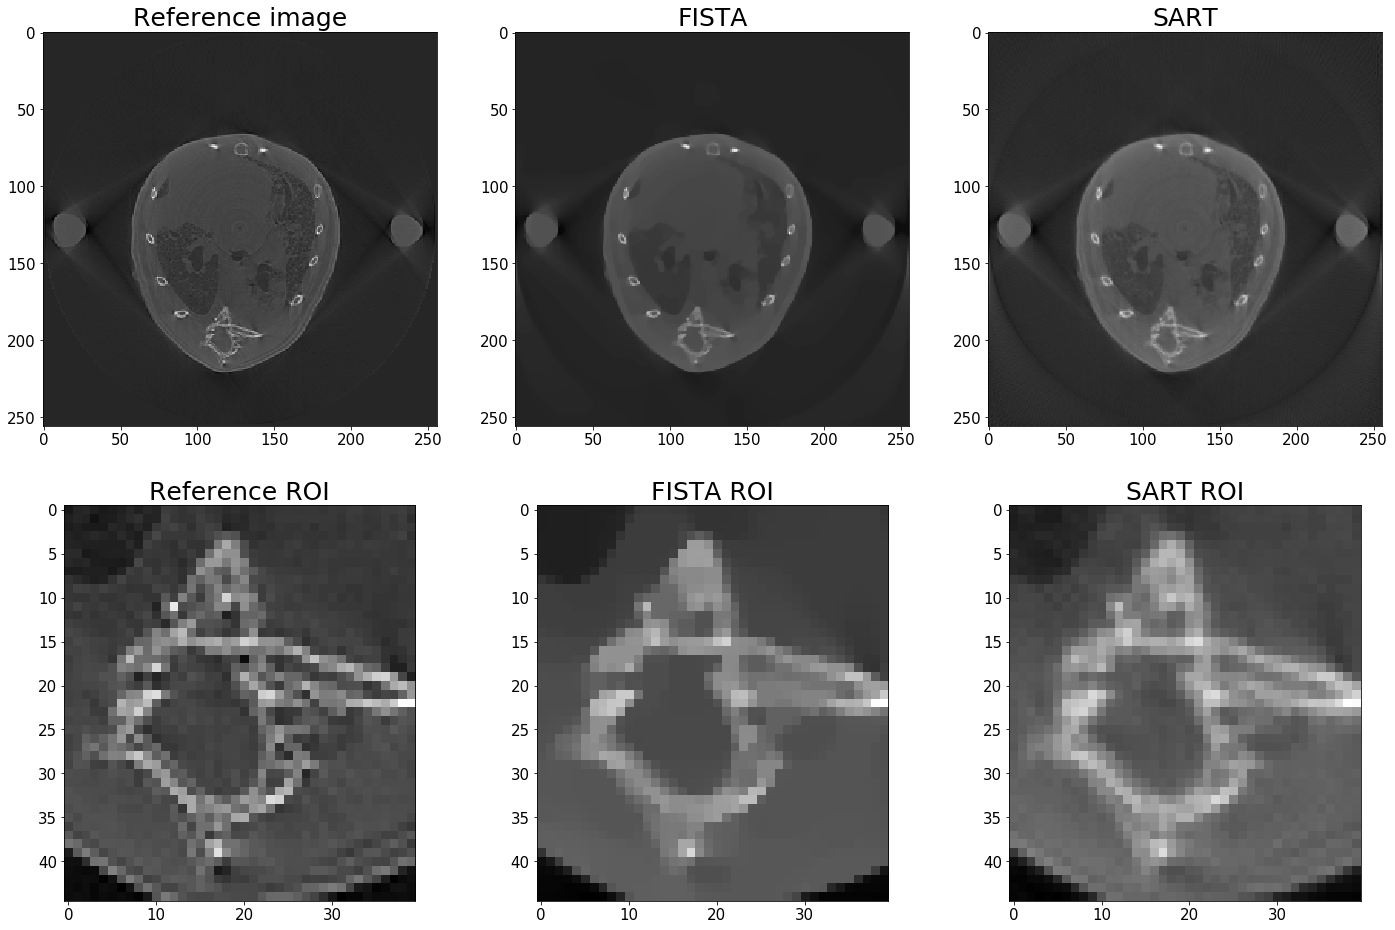

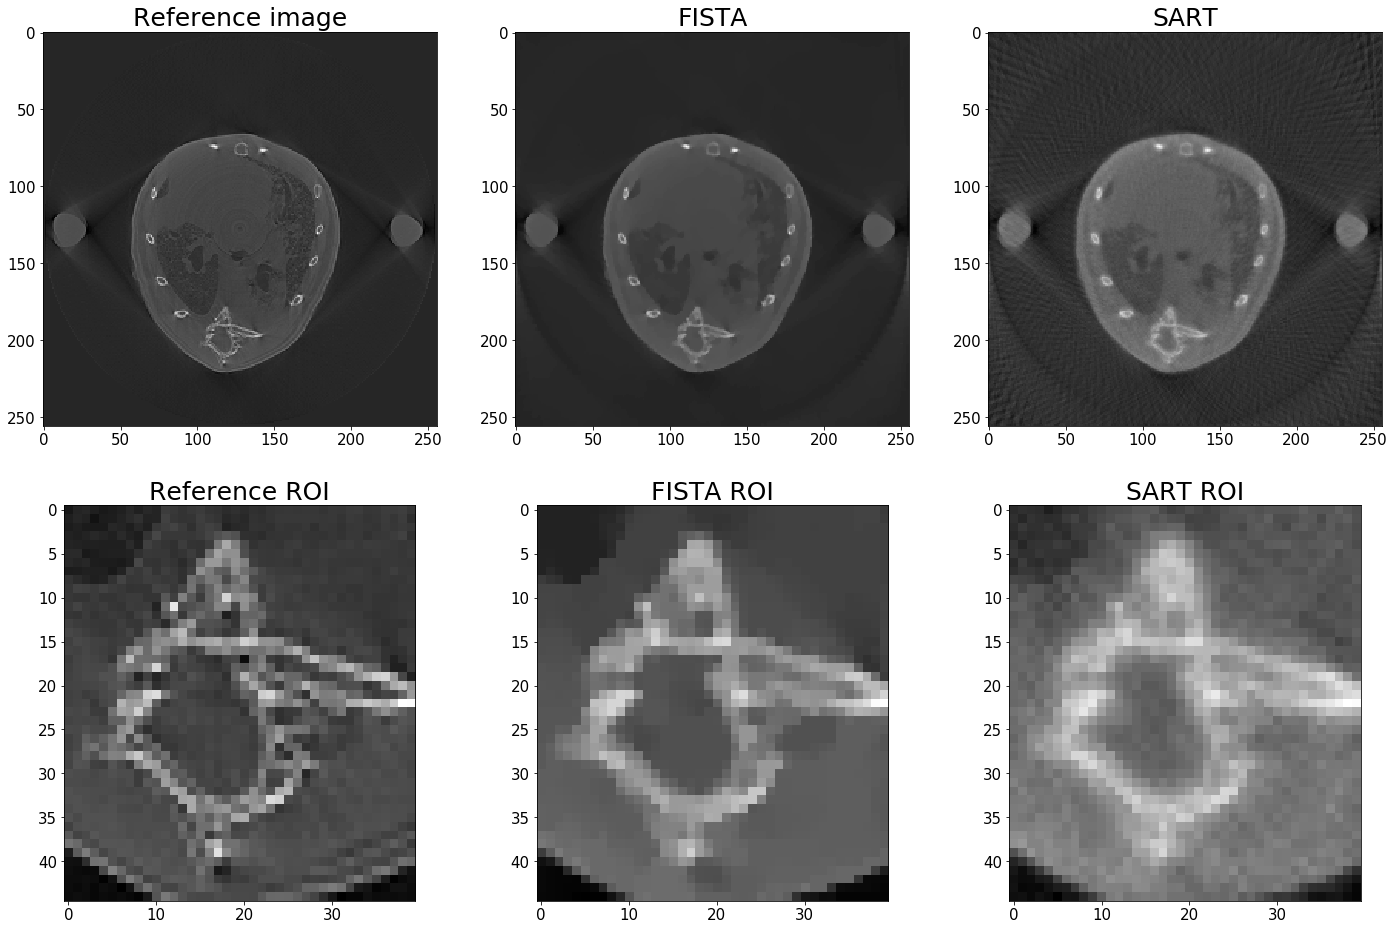

In [5]:
# Store metrics as lists of lists, each inner list contains the FISTA full metric, FISTA ROI metric, SART full metric, and SART ROI metric
ssim = []
mse = []
data_range = ref_image.max() - ref_image.min()

for fista, sart, comparison in zip(fista_reconstructions, sart_reconstructions, comparison_names):
    fista = np.loadtxt(fista)
    sart = np.loadtxt(sart)
    ssim_recon = []
    mse_recon = []
    
    # Set up plotting
    row_size, col_size = mpl.rcParams["figure.figsize"]
    fig, ax_list = plt.subplots(ncols=3, nrows=2, figsize=(row_size * 3, col_size * 2))
    
    # Plot the original image
    ax_list[0, 0].imshow(ref_image)
    ax_list[0, 0].set_title("Reference image")
    ax_list[1, 0].imshow(ref_roi)
    ax_list[1, 0].set_title("Reference ROI")
    
    for i, (image, name) in enumerate(zip([fista, sart], ["FISTA", "SART"]), 1):
        # Global metric
        ssim_recon.append(metrics.structural_similarity(ref_image, image, data_range=data_range))
        mse_recon.append(metrics.mean_squared_error(ref_image, image))
        
        # ROI metric
        image_roi = get_roi(image)
        ssim_recon.append(metrics.structural_similarity(ref_roi, image_roi, data_range=data_range))
        mse_recon.append(metrics.mean_squared_error(ref_roi, image_roi))
        
        # Plot the image
        ax_list[0, i].imshow(image)
        ax_list[0, i].set_title(name)
        ax_list[1, i].imshow(image_roi)
        ax_list[1, i].set_title(f"{name} ROI")
        
    # Save the figure
    fig.savefig(f"{comparison}.png")
    
    ssim.append(ssim_recon)
    mse.append(mse_recon)
    
# Save the results
pd.DataFrame(mse, index=[540, 270, 90], columns=["FISTA", "FISTA ROI", "SART", "SART ROI"]).to_csv(os.path.join(results_dir, "mseMetrics.txt"), sep="\t")
pd.DataFrame(ssim, index=[540, 270, 90], columns=["FISTA", "FISTA ROI", "SART", "SART ROI"]).to_csv(os.path.join(results_dir, "ssimMetrics.txt"), sep="\t")